# part 1

## a)
- Ex,y,S[(y − fS(x))2
] = Ex[vary|x(y) + varS(fS(x)) + bias(fS(x))2
].

## b) 
#### Logistic Regression might outperform LDA when:

- Non-Normality: Logistic regression does not assume normality of the predictors, and can therefore perform better when this assumption is violated.

- Non-Equal Covariance Matrices: Logistic regression does not assume equal covariance matrices of the classes, unlike LDA. So, it can perform better when this assumption is not met.

- High-Dimensional Data: Logistic regression tends to be more robust on high-dimensional data or when the number of predictors is large in relation to the number of observations.

#### LDA might outperform Logistic Regression when:

- Normality: If the predictors are normally distributed and the classes have common covariance matrices, LDA can outperform logistic regression.

- Estimation of Class Priors: LDA estimates the prior probabilities of the classes from the data, which can be beneficial if the classes are imbalanced.

- Computational Efficiency: LDA can be more computationally efficient than logistic regression, especially when the dimensionality of the data is high.

## c)
- Sparsity of the Data: In high-dimensional spaces, data becomes sparse. This sparsity makes it difficult for the KNN algorithm to find nearest neighbors that are actually similar. Even the closest points are far away in high dimensions, leading to less reliable predictions.

- Increased Computational Cost: As the number of dimensions increases, the computational cost of finding the nearest neighbors increases exponentially. This is because the algorithm needs to calculate the distance of a point to every other point in the dataset, which becomes computationally expensive with an increase in dimensions.

- Irrelevant Features: With high dimensionality, the dataset may contain irrelevant features that do not contribute to the final output but still influence the distance calculation. This can lead to poor performance of the KNN algorithm as it considers all features equally in the distance calculation.

- Overfitting: High dimensionality can lead to overfitting in KNN. With an increase in dimensions, the model starts to fit the noise in the data rather than the underlying pattern. This is because in high dimensions, the model has more options (or directions) to erratically oscillate and fit the noise.

## d)
Nested cross-validation is a procedure used for selecting and evaluating a model when there is a need to tune hyperparameters. It involves two levels of cross-validation, often referred to as the inner loop and the outer loop.

-    Outer Loop: The data is split into training and test sets using k-fold cross-validation. For each of these folds, the inner loop is executed.

-    Inner Loop: The training set from the outer loop is further split into a training and validation set, again using k-fold cross-validation. The model’s hyperparameters are tuned on this inner loop.

The process is repeated until each fold has served as the test set in the outer loop. The performance of the model is then averaged over the performance on all outer loop test sets.

The benefits of nested cross-validation include:

1. Unbiased Model Evaluation: Nested cross-validation provides an unbiased estimate of the model performance because it ensures that the test data in the outer loop is not used in any way to create the model.
2. Hyperparameter Tuning: The inner loop allows for hyperparameter tuning, which can help improve the model’s performance.
3. Model Selection: Nested cross-validation can be used to compare different types of models with their own sets of hyperparameters. The model with the best average performance in the outer loop is selected.
4. Avoid Overfitting: By keeping a separate test set in the outer loop, nested cross-validation helps to avoid overfitting on the validation set during hyperparameter tuning in the inner loop.

It’s important to note that nested cross-validation can be computationally expensive due to the multiple levels of cross-validation. Therefore, it’s typically used in situations where an unbiased estimate of the model performance is critical.

## e)
If we use a combination of the penalty term in Lasso (L1 regularization) and Ridge regression (L2 regularization), we get a model known as Elastic Net. Elastic Net is particularly useful when there are multiple features which are correlated. Lasso alone tends to arbitrarily select any one feature among the highly correlated ones, but Elastic Net will include all of them.

-   L1 Norm (Absolute Value Sum): It is simply the sum of the absolute values of the coefficients. L1 norm has the property of producing many coefficients with zero values or sparse solutions.

-   L2 Norm (Euclidean Distance): It is the square root of the sum of the square of the coefficients. L2 norm has the property of spreading error among all the terms and works well when all features influence the output.

The intuition behind these norms lies in how they penalize the size of the coefficients of the regression model. L1 norm tends to create sparsity in the parameters (making them zero) thus making it useful for feature selection, while L2 norm distributes the error among all the terms thereby preventing any one feature from dominating the others.

If we replace Norm-p or Norm-infinity instead of norm-1 or norm-2, the result would be different:

-   Norm-p: This is a more generalized form of norm. For a vector, it is the p-th root of the sum of the absolute values raised to the power p. As p approaches infinity, Norm-p becomes closer to Norm-infinity.

-   Norm-infinity: This is also known as Max Norm because it simply takes the maximum absolute value in the vector as the norm. This norm tries to minimize the maximum value in the vector.

In terms of their impact on regression or classification, Norm-p and Norm-infinity could lead to different solutions and decision boundaries, and their effectiveness would depend on the specific problem and data at hand. They could potentially lead to more robust models in the presence of outliers (Norm-infinity) or different levels of sparsity (Norm-p).

## f)
1. Draw a Bootstrap Sample: Draw a sample with replacement from the original data of the same size as the original data. This is called a bootstrap sample. The idea is that this sample is representative of the original data.
2. Compute the Bootstrap Statistic: Compute the mean of this bootstrap sample. This is the bootstrap statistic and is an estimate of the population mean.
3. Repeat the Process: Repeat steps 1 and 2 many times (say, B times, where B is a large number like 1000 or 10000) to get a distribution of the bootstrap statistics.
4. Compute the Standard Error: The standard error of the sample mean can then be estimated as the standard deviation of the bootstrap statistics. This gives an estimate of how much the sample mean varies across different samples from the population.

## g)
- Model Complexity: Cross-validation allows us to estimate the test error associated with model’s complexity. A model with lower complexity might have high bias (underfitting), and a model with higher complexity might have high variance (overfitting). By plotting the cross-validation error against model complexity, we can find the optimal complexity that balances bias and variance, minimizing the total error.

- Model Selection: Cross-validation can be used to select the model that performs the best on unseen data. This helps in choosing the model that generalizes well, effectively balancing bias and variance.

- Hyperparameter Tuning: Cross-validation is often used for tuning hyperparameters, which can directly impact the bias-variance trade-off. For example, in a decision tree, the depth of the tree is a hyperparameter. A shallow tree (low depth) might underfit (high bias), while a deep tree (high depth) might overfit (high variance). Cross-validation can help find the optimal tree depth.




# part 2

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [6]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
sample_submission = pd.read_csv("sample_submission.csv")

test =  test.join(sample_submission["Transported"])

print(train.isnull().sum())
print(test.isnull().sum())

train

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
Transported       0
dtype: int64


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [7]:
train = train.drop(columns=['PassengerId' , 'Cabin' , "Name"])

train = train.dropna()

train_x = train.drop(columns=["Transported"])
train_y = train["Transported"]

encoder = LabelEncoder()
def coding(df , name) :
    df[name] = encoder.fit_transform(df[name] )

coding(train_x , name ="HomePlanet")
coding(train_x , name ="Destination")



In [8]:
train_x

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,False,2,39.0,False,0.0,0.0,0.0,0.0,0.0
1,0,False,2,24.0,False,109.0,9.0,25.0,549.0,44.0
2,1,False,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,1,False,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,0,False,2,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8688,1,False,0,41.0,True,0.0,6819.0,0.0,1643.0,74.0
8689,0,True,1,18.0,False,0.0,0.0,0.0,0.0,0.0
8690,0,False,2,26.0,False,0.0,0.0,1872.0,1.0,0.0
8691,1,False,0,32.0,False,0.0,1049.0,0.0,353.0,3235.0


#### use rbf

In [9]:
model = svm.SVC(kernel="rbf")
model.fit(train_x , train_y)

SVC()

In [10]:
train_y_pred = model.predict(train_x)
print(accuracy_score(train_y , train_y_pred))

#model.score(train_x , train_y)


0.7945977177524195


In [11]:

test = test.drop(columns=[ 'PassengerId' ,'Cabin' , "Name"])

test = test.dropna()

test_x = test.drop(columns=["Transported"])
test_y = test["Transported"]
coding(test_x , name ="HomePlanet")
coding(test_x , name ="Destination")



- result :

In [12]:
y_pred = model.predict(test_x)
accuracy_score(test_y, y_pred)

0.40575916230366493

#### use cross validation and polynomial kernel , LogisticRegression and LDA

In [13]:
best_score = 0
best_model = None
for i in range (1 , 6):
    if i in [1 , 2 , 3]:
        model =  svm.SVC(kernel="poly" , degree=i)
    elif i == 4 :
        model = LogisticRegression()
    else:
        model = LinearDiscriminantAnalysis()

    scores = cross_val_score(model, train_x, train_y, cv=5)
    score = scores.mean()
    print(i)
    print(scores)
    
    if score > best_score :
        best_score = score
        best_model = model

1
[0.7631769  0.76101083 0.77472924 0.79552023 0.78612717]
2
[0.66787004 0.65198556 0.69025271 0.69653179 0.65679191]
3
[0.62093863 0.59855596 0.62815884 0.6466763  0.60115607]


c:\Users\navid\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\navid\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

4
[0.78483755 0.76823105 0.7732852  0.78684971 0.79479769]
5
[0.75018051 0.75812274 0.76173285 0.77528902 0.77023121]


c:\Users\navid\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\navid\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

- result :

In [14]:
best_model.fit(train_x , train_y)

y_pred = best_model.predict(test_x)
accuracy_score(test_y, y_pred)

c:\Users\navid\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4595695171611402

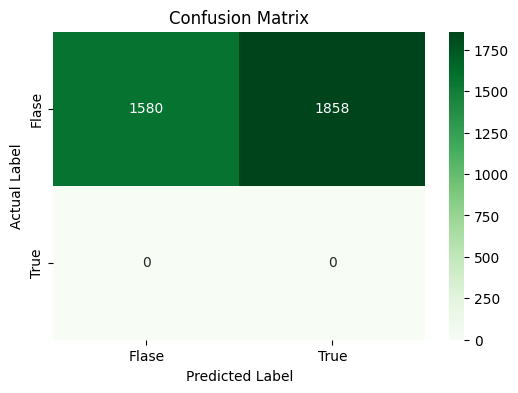

In [63]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(test_y , y_pred)

conf_matrix
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Flase', 'True'], yticklabels=['Flase', 'True'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()